<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/ML_med_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
parkinsons = fetch_ucirepo(id=174)

# data (as pandas dataframes)
X = parkinsons.data.features
y = parkinsons.data.targets

# metadata
print(parkinsons.metadata)

# variable information
print(parkinsons.variables)


{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C59C74', 'creators': ['Max Little'], 'intro_paper': {'title': 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 'authors': 'Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz', 'published_in': 'BioMedical Engineering OnLine', 'year': 2007, 'url': 'https://www.semanticscholar.org/paper/27e1dcd0d64bfc9d936e597d4f29b8

Этот набор данных состоит из ряда медицинских измерений голоса 31 человека, 23 из которых страдают болезнью Паркинсона (БП).

Каждый столбец таблицы представляет собой определенный показатель голоса, а каждая строка соответствует одной из 195 записей голоса этих людей (столбец «name»).

Основная цель данных - отличить здоровых людей от людей с БП в соответствии с столбцом «статус», в котором установлено значение 0 для здоровых и 1 для БП.

Строки файла CSV содержат экземпляр, соответствующий одной голосовой записи. На каждого пациента приходится около шести записей, имя пациента указано в первом столбце.

начение 0 для здоровых и 1 для БП.

Строки файла CSV содержат экземпляр, соответствующий одной голосовой записи. На каждого пациента приходится около шести записей, имя пациента указано в первом столбце.



 Боле́знь Паркинсо́на (синонимы: идиопатический синдром паркинсонизма, дрожательный паралич) — медленно прогрессирующее хроническое нейродегенеративное неврологическое заболевание, характерное для лиц старшей возрастной группы. Относится к дегенеративным заболеваниям экстрапирамидной моторной системы. Вызвано прогрессирующим разрушением и гибелью нейронов, вырабатывающих нейромедиатор дофамин, — прежде всего в чёрной субстанции, а также и в других отделах центральной нервной системы. Недостаточная выработка дофамина ведёт к тормозному влиянию базальных ганглиев на кору головного мозга.

 Среди органических и функциональных расстройств, вызывающих дизартрию(нарушение произносительной стороны речи, обусловленное недостаточностью иннервации речевого аппарата), значительное место занимают нейродегенеративные процессы головного мозга. Болезнь Паркинсона (БП) является вторым наиболее распространенным прогрессирующим заболеванием после болезни Альцгеймер.

In [24]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


from sklearn.ensemble import  RandomForestClassifier




from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
# variable information
parkinsons.variables

,name,role,type,demographic,description,units,missing_values
0,name,ID,Categorical,None,None,None,no
1,MDVP:Fo,Feature,Continuous,None,None,Hz,no
2,MDVP:Fhi,Feature,Continuous,None,None,Hz,no
3,MDVP:Flo,Feature,Continuous,None,None,Hz,no
4,MDVP:Jitter,Feature,Continuous,None,None,%,no
5,MDVP:Jitter,Feature,Continuous,None,None,Abs,no
6,MDVP:RAP,Feature,Continuous,None,None,None,no
7,MDVP:PPQ,Feature,Continuous,None,None,None,no
8,Jitter:DDP,Feature,Continuous,None,None,None,no
9,MDVP:Shimmer,Feature,Continuous,None,None,None,no


In [5]:
X.info()
# пропущенных значений нет, всего 22 колонки, тип данных float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:Fo       195 non-null    float64
 1   MDVP:Fhi      195 non-null    float64
 2   MDVP:Flo      195 non-null    float64
 3   MDVP:Jitter   195 non-null    float64
 4   MDVP:Jitter   195 non-null    float64
 5   MDVP:RAP      195 non-null    float64
 6   MDVP:PPQ      195 non-null    float64
 7   Jitter:DDP    195 non-null    float64
 8   MDVP:Shimmer  195 non-null    float64
 9   MDVP:Shimmer  195 non-null    float64
 10  Shimmer:APQ3  195 non-null    float64
 11  Shimmer:APQ5  195 non-null    float64
 12  MDVP:APQ      195 non-null    float64
 13  Shimmer:DDA   195 non-null    float64
 14  NHR           195 non-null    float64
 15  HNR           195 non-null    float64
 16  RPDE          195 non-null    float64
 17  DFA           195 non-null    float64
 18  spread1       195 non-null    

In [6]:
X.head(5)

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
column = 'status'
unique_vals = y[column].unique()
print('Unique statuses:')
sorted(unique_vals)

Unique statuses:


[0, 1]

In [8]:
y.info() # целевая переменная

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   status  195 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [9]:
y['status'].value_counts() # есть дисбаланс в сторону больных БП, датасет небольшой, в основном состоит из больных пациентов
# возможно модель будет предсказывать в сторону БП и на здоровых. Можно либо сбалансировать классы, либо выбрать метрику F1, а не accurarcy

status
1    147
0     48
Name: count, dtype: int64

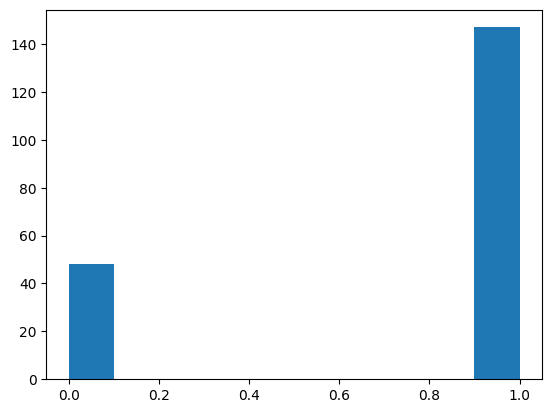

In [10]:
plt.hist(y)


plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNN Classifier

In [17]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
y_pred_KNN =KNN_model.predict(X_test)

accuracy_KNN_model = accuracy_score(y_test, y_pred_KNN)
print(y_pred_KNN)

print(accuracy_KNN_model) #  помним про дисбаланс

[1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1]
0.8205128205128205


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


DecisionTreeClassifier

In [28]:
model_clf_tree = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=5, min_samples_leaf=5)


model_clf_tree = model_clf_tree.fit(X_train, y_train)
y_pred_clf = model_clf_tree.predict(X_test)
accuracy_clf_tree = accuracy_score(y_test, y_pred_clf)
f1_clf_tree = f1_score(y_test, y_pred_clf)
print(accuracy_clf_tree)
print(f1_clf_tree)

0.9487179487179487
0.9696969696969697


Random Forest

In [29]:
model_RF = RandomForestClassifier(random_state=100, max_depth=5, n_estimators=100)
model_RF = model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)

print(accuracy_RF)
print(f1_RF)

<ipython-input-29-fc88b9518f35>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF = model_RF.fit(X_train, y_train)


0.9487179487179487
0.9696969696969697


MLPClassifier


In [35]:
model_mlp_clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred_mlp_clf = model_mlp_clf.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp_clf)
f1_mlp = f1_score(y_test, y_pred_mlp_clf)

print(accuracy_mlp)
print(f1_mlp)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8461538461538461
0.9090909090909091


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


лучший скор у случайного леса.
попробуем сбалансировать данные


In [36]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [37]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [38]:
KNN_model_b = KNeighborsClassifier()
KNN_model_b.fit(X_train_b, y_train_b)
y_pred_KNN_b =KNN_model_b.predict(X_test_b)

accuracy_KNN_model_b = accuracy_score(y_test_b, y_pred_KNN_b)
print(y_pred_KNN_b)

print(accuracy_KNN_model_b) #  помним про дисбаланс

[0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0]
0.864406779661017


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
model_clf_tree_b = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=5, min_samples_leaf=5)


model_clf_tree_b = model_clf_tree_b.fit(X_train_b, y_train_b)
y_pred_clf_b = model_clf_tree_b.predict(X_test_b)
accuracy_clf_tree_b = accuracy_score(y_test_b, y_pred_clf_b)
f1_clf_tree_b = f1_score(y_test_b, y_pred_clf_b)
print(accuracy_clf_tree_b)
print(f1_clf_tree_b)

0.9830508474576272
0.9824561403508771


In [40]:
model_RF_b = RandomForestClassifier(random_state=100, max_depth=5, n_estimators=100)
model_RF_b = model_RF_b.fit(X_train_b, y_train_b)
y_pred_RF_b = model_RF_b.predict(X_test_b)
accuracy_RF_b = accuracy_score(y_test_b, y_pred_RF_b)
f1_RF_b = f1_score(y_test_b, y_pred_RF_b)

print(accuracy_RF_b)
print(f1_RF_b)

<ipython-input-40-aff37a31ce1d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF_b = model_RF_b.fit(X_train_b, y_train_b)


1.0
1.0


In [41]:
model_mlp_clf_b = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred_mlp_clf_b = model_mlp_clf_b.predict(X_test_b)
accuracy_mlp_b = accuracy_score(y_test_b, y_pred_mlp_clf_b)
f1_mlp_b = f1_score(y_test_b, y_pred_mlp_clf_b)

print(accuracy_mlp_b)
print(f1_mlp_b)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7796610169491526
0.8115942028985508


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Когда данные стали сбалансированные, скоры моделей стали лучше, у RF аж достиг 💯, что наводит на мысль о переобучении, возможно можно поиграться с параметрами, скор MLP стал ниже.


In [43]:
feature_importances_clf_tree = model_clf_tree.feature_importances_
feature_importances_clf_tree

array([0.27964702, 0.        , 0.        , 0.        , 0.14772531,
       0.08286547, 0.        , 0.        , 0.00542717, 0.02196611,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.46236892])

In [48]:
feature_importances_RF = model_RF.feature_importances_
feature_importances_RF

array([0.12164772, 0.0651664 , 0.05159228, 0.02702207, 0.02138887,
       0.04280803, 0.03677607, 0.05817776, 0.0121649 , 0.01300769,
       0.0219853 , 0.03656226, 0.03213533, 0.02086912, 0.03904835,
       0.01744312, 0.01821362, 0.03139465, 0.07849833, 0.05721985,
       0.04031614, 0.15656213])